# KNN vs RNN Classifier on Wine Dataset  
**Name:** Jacob Jeffers  
**Course:** MSCS 634  
**Lab:** Lab 2 – KNN and RNN Performance Exploration  


In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# View feature and class info
print(X.head())
print("\nClass distribution:\n", pd.Series(y).value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K = {k} → Accuracy: {acc:.4f}")


K = 1 → Accuracy: 0.7778
K = 5 → Accuracy: 0.7222
K = 11 → Accuracy: 0.7500
K = 15 → Accuracy: 0.7500
K = 21 → Accuracy: 0.7778


In [11]:
from sklearn.neighbors import RadiusNeighborsClassifier

r_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in r_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)

    # Remove outliers (-1 predictions) for accuracy scoring
    filtered = [(pred, actual) for pred, actual in zip(y_pred, y_test) if pred != -1]
    if filtered:
        preds, actuals = zip(*filtered)
        acc = accuracy_score(actuals, preds)
    else:
        acc = 0
    rnn_accuracies.append(acc)
    print(f"Radius = {radius} → Accuracy: {acc:.4f}")


Radius = 350 → Accuracy: 0.7500
Radius = 400 → Accuracy: 0.7222
Radius = 450 → Accuracy: 0.7222
Radius = 500 → Accuracy: 0.7222
Radius = 550 → Accuracy: 0.7222
Radius = 600 → Accuracy: 0.7222


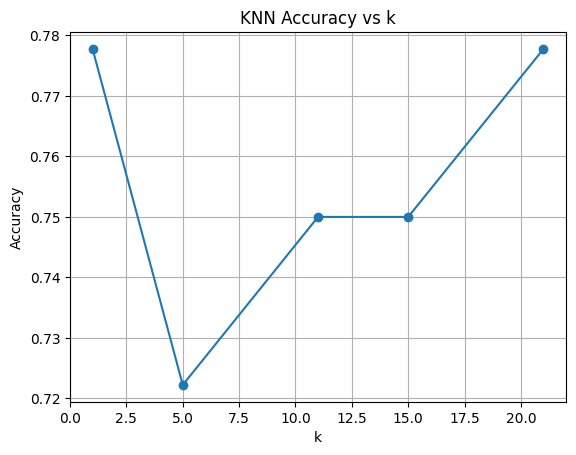

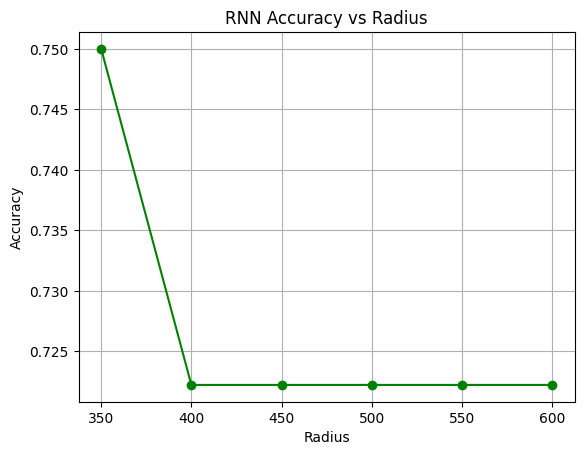

In [12]:
import matplotlib.pyplot as plt

# Plot KNN accuracy
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot RNN accuracy
plt.figure()
plt.plot(r_values, rnn_accuracies, marker='o', color='green')
plt.title('RNN Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
